In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()
! conda install psi4 -c psi4
! pip install openfermion
! pip install openfermionpyscf==0.5
! pip install qiskit
! pip install git+https://github.com/tequilahub/tequila.git@devel

# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503227 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069175 Eh
E = -1.1369289594005694 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154682491653282 Eh
E = -0.9873929962932158 Eh
E = -0.9670259116093081 Eh
E = -0.9534242125062946 Eh
E = -0.9449089870950513 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283358 Eh
E = -0.9351960308386078 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411336572 Eh
E = -0.8397057843499892 Eh
E = -1.0748879317191187 Eh
E = -1.1175258568986868 Eh
E = -1.0951595815644861 Eh
E = -1.0495617842752063 Eh
E = -0.9960202460350621 Eh
E = -0.9415475409906798 Eh
E = -0.8899750208893151 Eh
E = -0.8432718025417757 Eh
E = -0.8022428650141392 Eh
E = -0.7669825247360009 Eh
E = -0.737154544898827 Eh
E = -0.7121961606082455 Eh
E = -0.6914700512624807 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436212 Eh
E = -0.8488985094851157 Eh
E = -1.088231017430786 Eh
E = -1.1369333351418645 Eh
E = -1.1229593878059765 Eh
E = -1.0887606905920533 Eh
E = -1.0504260893271258 Eh
E = -1.015441636439638 Eh
E = -0.9873692257052733 Eh
E = -0.9670168314563375 Eh
E = -0.9534301294889965 Eh
E = -0.9449225613845078 Eh
E = -0.9398332746700113 Eh
E = -0.9368793989542739 Eh
E = -0.9351989265367047 Eh


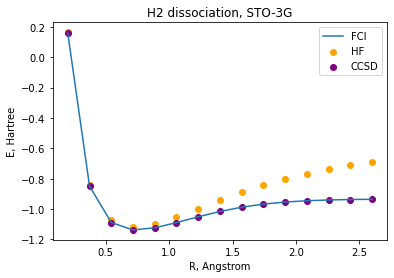

In [6]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [7]:
bond_lengths = np.linspace(0.5,2.7,15)

In [8]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998408 Eh
E = -74.47523205267994 Eh
E = -74.90413378058085 Eh
E = -75.01383133956638 Eh
E = -75.00356512166869 Eh
E = -74.95170869126753 Eh
E = -74.8921864821597 Eh
E = -74.83923063661545 Eh
E = -74.79866365936483 Eh
E = -74.77161515186873 Eh
E = -74.75568947215943 Eh
E = -74.74704715250577 Eh
E = -74.74248898749259 Eh
E = -74.74007426355803 Eh
Could not converge


In [9]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.1294816132027 Eh
E = -74.45343797012882 Eh
E = -74.87055361048274 Eh
E = -74.96308510923824 Eh
E = -74.92817508739554 Eh
E = -74.84281942863745 Eh
E = -74.74051950148719 Eh
E = -74.63577758413565 Eh
E = -74.53576638657329 Eh
E = -74.4449438474384 Eh
E = -74.36975504261729 Eh
E = -74.29778481417816 Eh
E = -74.24167220050909 Eh
E = -74.27129957697417 Eh
Could not converge


In [10]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.1427636391869 Eh
E = -74.47519485717146 Eh
E = -74.90406353010555 Eh
E = -75.01370018934803 Eh
E = -75.00330155818891 Eh
E = -74.95116757042632 Eh
E = -74.89128367467832 Eh
E = -74.8385340113911 Eh
E = -74.80070162375989 Eh
E = -74.78105738717322 Eh
E = -74.74394274755763 Eh
E = -74.77972801511778 Eh
E = -74.78338963453103 Eh
E = -74.64224434263167 Eh
Could not converge


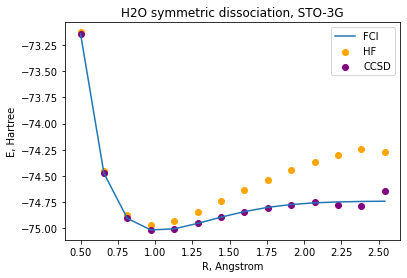

In [11]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

# Generating Qubit Hamiltonians

In [1]:
from utility import *
import numpy as np 

Specify the Qubit Hamiltonian of a molecule by its name, internuclear distances, basis set, and fermion-to-qubit transformation.
Here, we show the resulting Hamiltonian for $H_2$ in STO-3G with $1\overset{\circ}{A}$ between the $H$ atoms. 

In [2]:
qubit_transf = 'jw' # Jordan-Wigner transformations
h2 = get_qubit_hamiltonian(mol='h2', geometry=1, basis='sto3g', qubit_transf=qubit_transf)
print("H:\n{}".format(h2))

H:
-0.3276081896748093 [] +
-0.04919764587136755 [X0 X1 Y2 Y3] +
0.04919764587136755 [X0 Y1 Y2 X3] +
0.04919764587136755 [Y0 X1 X2 Y3] +
-0.04919764587136755 [Y0 Y1 X2 X3] +
0.13716572937099508 [Z0] +
0.15660062488237947 [Z0 Z1] +
0.10622904490856075 [Z0 Z2] +
0.15542669077992832 [Z0 Z3] +
0.13716572937099503 [Z1] +
0.15542669077992832 [Z1 Z2] +
0.10622904490856075 [Z1 Z3] +
-0.13036292057109106 [Z2] +
0.16326768673564346 [Z2 Z3] +
-0.13036292057109106 [Z3]


This Qubit Hamiltonian encodes all of the $2^N$ eigenstates and eigenenergies, where $N=4$ is the number of qubits. 
In principle, one can represent the Hamiltonian as a matrix with $2^N$ dimensions and find the eigenvalues classically through diagonalization, but the cost of this approach clearly grows exponentially with $N$. 

Still, we can check that this approach indeed recovers the ground state energy against method in S1. 

In [3]:
# Defining pauli matrices 
I, X, Y, Z = np.identity(2), np.array([[0, 1], [1, 0]]), np.array([[0, -1j], [1j, 0]]), np.array([[1, 0], [0, -1]])

# Build matrix representiation of the Hamiltonian H
n_qubits = openfermion.count_qubits(h2)
h2_matrix = np.zeros((2**n_qubits, 2**n_qubits), dtype=np.complex)
for term, term_coeff in h2.terms.items(): # Iterate over pauli-words of H
    term = dict(term) # Dict[qubit_index, 'X'/'Y'/'Z']
    
    # Build matrix rep of current pauli-word using kronecker product to represent x_i y_j ...
    pw_matrix = np.identity(1)
    for i in range(n_qubits):
        if i not in term:        pw_matrix = np.kron(pw_matrix, I)
        else:
            if term[i] == 'X':   pw_matrix = np.kron(pw_matrix, X)
            elif term[i] == 'Y': pw_matrix = np.kron(pw_matrix, Y)
            else:                pw_matrix = np.kron(pw_matrix, Z)
    h2_matrix += pw_matrix * term_coeff

eigvals, _ = np.linalg.eigh(h2_matrix)
print("The ground state energy from S1: ")
obtain_PES('h2', [1], 'sto-3g', 'fci')
print("\nThe eigenvalues in the matrix representation of Hamiltonian: \n{}".format(eigvals))

The ground state energy from S1: 
E = -1.1011503301329566 Eh

The eigenvalues in the matrix representation of Hamiltonian: 
[-1.10115033 -0.74587179 -0.74587179 -0.74587179 -0.60860671 -0.60860671
 -0.58166697 -0.58166697 -0.35229063 -0.06021529 -0.06021529 -0.05994379
 -0.05994379  0.03904763  0.50196598  0.52917721]


Alternatively, the qubit-tapering technique can find a smaller effective Hamitlonian by subsitituting operators with $\pm 1$. This technique is detailed in Bravyi's work ([Bravyi et al., "Tapering off qubits to simulate fermionic Hamiltonians", arXiv:1701.08213](https://arxiv.org/abs/1701.08213)). 

In [4]:
print("The effective Hamiltonian:\n {}".format(taper_hamiltonian(h2, n_spin_orbitals=4, n_electrons=2, qubit_transf=qubit_transf))) 

The effective Hamiltonian:
 -0.5310513494337645 [] +
0.1967905834854702 [X0] +
-0.5350572998841723 [Z0]


We can verify that this new Hamiltonian still encodes the ground state energy. 

In [5]:
# Building the matrix representation of the effective Hamiltonian
h2_matrix = -0.53105134 * I + 0.19679058 * X - 0.53505729 * Z

# Obtain the eigenvalues
eigvals, _ = np.linalg.eigh(h2_matrix)
print("The eigenvalues in the effective Hamiltonian: \n {}".format(eigvals))

The eigenvalues in the effective Hamiltonian: 
 [-1.10115031  0.03904763]


# Unitary ansatz entering the VQE

The final energy output of a VQE calculation will crucially depend on the ansatz/form of the parameterized unitary $\hat U(\boldsymbol{\theta})$ employed in state preparation. Here we review two popular approaches, the unitary coupled cluster and qubit coupled cluster methodologies, and benchmark them for energy calculations of small molecules.

In [1]:
import numpy as np
import tequila as tq
from utility import *
threshold = 1e-6 #Cutoff for UCC MP2 amplitudes and QCC ranking gradients

## Unitary Coupled Cluster (UCC)

The UCC ansatz is obtained by 'unitarizing' the traditional coupled cluster ansatz,
$$ e^{\hat T} \rightarrow e^{\hat T - \hat T^\dagger} \equiv \hat U_{\text{UCC}}$$


Due to non-commutativity of terms in $\hat T - \hat T^\dagger$, the UCC ansatz does not have a straightforward decomposition in terms of circuit primitives implementable on the quantum computer. Therefore, to obtain a form which can be compiled, we employ the Trotter approximation. The accuracy of the circuit ansatz relative to the exact UCC operator will be dependent on how many Trotter steps are employed. The number of Trotter steps is commonly set to its minimal value of one to avoid excessive circuit depth.

In [2]:
trotter_steps = 1

### H2 in STO-3G basis

Below is a sample VQE simulation using the UCCSD ansatz compiled using a single trotter step for H$_2$ in minimal basis at $R=2.5$ (Angstrom). For comparison, we can run FCI to obtain the true ground state energy.


In [3]:
xyz_data = get_molecular_data('h2', geometry=2.5, xyz_format=True)
basis='sto-3g'

h2 = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set=basis)

print('Number of spin-orbitals (qubits): {} \n'.format(2*h2.n_orbitals))

E_FCI = h2.compute_energy(method='fci')

print('FCI energy: {}'.format(E_FCI))

Number of spin-orbitals (qubits): 4 

FCI energy: -0.9360549199436616


The UCCSD VQE optimization is of the form
$$E = \min_{\boldsymbol{\theta}} \langle \text{HF} | \hat U_{\text{UCC}}^\dagger(\boldsymbol{\theta}) \hat H  \hat U_{\text{UCC}} (\boldsymbol{\theta}) | \text{HF} \rangle $$
To expedite the optimization process, we can set the initial guess of the amplitudes to zero, i.e. the optimization will begin at the Hartree Fock state. This heuristic is best suited for when Hartree Fock is believed to be in qualitative agreement with the true ground state. To further alleviate quantum resources, we can estimate the amplitudes using classical electronic structure methods (here, MP2 perturbation theory), and only include the unitaries with non-zero estimated amplitudes.

In [4]:
H = h2.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

U_UCCSD = h2.make_uccsd_ansatz(initial_amplitudes='MP2',threshold=threshold, trotter_steps=trotter_steps)

E = tq.ExpectationValue(H=H, U=U_UCCSD)

print('\nNumber of UCCSD amplitudes: {} \n'.format(len(E.extract_variables())))

print('\nStarting optimization:\n')

result = tq.minimize(objective=E, method="BFGS", initial_values={k:0.0 for k in E.extract_variables()}, tol=1e-6)

print('\nObtained UCCSD energy: {}'.format(result.energy))


Hamiltonian has 15 terms


Number of UCCSD amplitudes: 1 


Starting optimization:

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 4 expectationvalues

active variables : 1

E=-0.70294360  angles= {(1, 0, 1, 0): 0.0}  samples= None
E=-0.92698007  angles= {(1, 0, 1, 0): -0.5644201040267944}  samples= None
E=-0.93354955  angles= {(1, 0, 1, 0): -0.756477615750158}  samples= None
E=-0.93605486  angles= {(1, 0, 1, 0): -0.6900732530769251}  samples= None
E=-0.93605492  angles= {(1, 0, 1, 0): -0.690408042440764}  samples= None
E=-0.93605492  angles= {(1, 0, 1, 0): -0.6904070056201885}  samples= None
Optimization terminated successfully.
         Current function value: -0.936055
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6

Obtain

We see that the converged UCCSD energy is in exact agreement with the FCI energy, as expected for a $2$-electron system. 

### H2O in 6-31G basis

Now let us try a larger problem of H$_2$O in 6-31G basis. However, we will restrict the active space. The unrestricted problem leads to a $14$-qubit Hamiltonian, and $34$ UCCSD amplitudes to optimize even after neglecting the zero MP2 amplitudes. Therefore, we will remove some orbital degrees of freedom which are less important in accurately describing the electronic structure. By freezing all orbitals other than $0b_1$, $1b_1$, $2a_1$, and $3a_1$, we reduce the problem to an $8$-qubit Hamiltonian with $8$ UCCSD variational amplitudes.

In [5]:
xyz_data = get_molecular_data('h2o', geometry=1, xyz_format=True)

basis = '6-31g'
active = {'B1':[0,1], 'A1':[2,3]}
h2o = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set = basis, active_orbitals = active)

print('Number of spin-orbitals (qubits): {} \n'.format(2*h2o.n_orbitals))

E_FCI = h2o.compute_energy(method='fci')

print('FCI energy: {}'.format(E_FCI))

Number of spin-orbitals (qubits): 8 

FCI energy: -75.98980140961186


We will then run the UCCSD VQE simulation (***warning: tq.minimize will take several minutes - 1 hour + to converge for a VQE instance of this size.*** Smaller active spaces can be employed to lower VQE simulation runtimes).

In [6]:
H = h2o.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

U_UCCSD = h2o.make_uccsd_ansatz(initial_amplitudes='MP2',threshold=threshold, trotter_steps=trotter_steps)

E = tq.ExpectationValue(H=H, U=U_UCCSD)

print('\nNumber of UCCSD amplitudes: {} \n'.format(len(E.extract_variables())))

print('\nStarting optimization:\n')

result = tq.minimize(objective=E, method="BFGS", initial_values={k:0.0 for k in E.extract_variables()}, tol=1e-4)

print('\nObtained UCCSD energy: {}'.format(result.energy))


Hamiltonian has 185 terms


Number of UCCSD amplitudes: 8 


Starting optimization:

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 56 expectationvalues

active variables : 8

E=-75.98071144  angles= {(3, 0, 3, 0): 0.0, (3, 1, 2, 0): 0.0, (2, 1, 3, 0): 0.0, (2, 0, 3, 1): 0.0, (3, 0, 2, 1): 0.0, (2, 1, 2, 1): 0.0, (2, 0, 2, 0): 0.0, (3, 1, 3, 1): 0.0}  samples= None
E=-75.93754867  angles= {(3, 0, 3, 0): -0.1516876220703125, (3, 1, 2, 0): -0.0050506591796875, (2, 1, 3, 0): -0.03458404541015625, (2, 0, 3, 1): -0.10162353515625, (3, 0, 2, 1): 0.06198883056640625, (2, 1, 2, 1): -0.06015777587890625, (2, 0, 2, 0): 0.07421112060546875, (3, 1, 3, 1): 0.07421112060546875}  samples= None
E=-75.98799620  angles= {(3, 0, 3, 0): -0.04138819314568116, (3, 1, 2, 0): -0.00137807986

We obtain a UCCSD energy within chemical accuracy (< 1.6 miliHartree from FCI energy) for the H$_2$O molecule near equilibrium geometry. As the bond distance approaches the dissociation limit, the energy deviation from FCI is typically expected to increase as electronic correlations increase during covalent bond-breaking. Furthermore, as HF becomes energetically more distant from the FCI wavefunction, the initial guess of all amplitudes being zero may lead to a local minimum. One can then instead initialize the amplitudes using random guesses, and repeat for $n$ samples to attempt to find the global minimum. To facilitate this, one can run the commented lines below. This will execute $n$ instances of tq.minimize for uniformly random initial parameters in interval $[0, 2\pi]$ and return the lowest optimization result.

In [7]:
#n=10
#result = minimize_E_random_guesses(objective=E, method='BFGS', tol=1e-4, n=n)

## Qubit Coupled Cluster (QCC)

In contrast to UCC, the QCC methodology makes no direct reference to fermionic algebra and seeks to construct an efficient ansatz directly in qubit-space by finding multi-qubit Pauli strings (entanglers) which lower energy. This is done through an energy-lowering heuristic employing the energy gradient with respect to a Pauli strings variational amplitude. As opposed to UCCSD, the circuit depth and number of parameter is chosen to meet hardware limitations, i.e. one must choose how many exponentiated Pauli strings will be entering the QCC ansatz.

### H2 in STO-3G basis

Below we perform the entangler screening protocol for H2 in minimal basis, and obtain one grouping of entanglers with non-zero energy gradient. We then select one of them to be used in the QCC VQE simulation.

In [8]:
xyz_data = get_molecular_data('h2', geometry=2.5, xyz_format=True)
basis='sto-3g'

h2 = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set='sto-3g')

hf_reference = hf_occ(2*h2.n_orbitals, h2.n_electrons)

H = h2.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

#Define number of entanglers to enter ansatz
n_ents = 1

#Rank entanglers using energy gradient criterion
ranked_entangler_groupings = generate_QCC_gradient_groupings(H.to_openfermion(), 
                                                             2*h2.n_orbitals, 
                                                             hf_reference, 
                                                             cutoff=threshold)

print('Grouping gradient magnitudes (Grouping : Gradient magnitude):')
for i in range(len(ranked_entangler_groupings)):
    print('{} : {}'.format(i+1,ranked_entangler_groupings[i][1]))


entanglers = get_QCC_entanglers(ranked_entangler_groupings, n_ents, 2*h2.n_orbitals)

print('\nSelected entanglers:')
for ent in entanglers:
    print(ent)




Hamiltonian has 15 terms

Grouping gradient magnitudes (Grouping : Gradient magnitude):
1 : 0.2822

Selected entanglers:
1.0 [X0 Y1 X2 X3]


Once the QCC ranking procedure has been ran, we can simulate the QCC VQE optimization with the generated entanglers. The VQE optimization for the QCC ansatz is of the form
$$E = \min_{\boldsymbol{\Omega}, \boldsymbol{\tau}} \langle \boldsymbol{\Omega} | U_{\text{ENT}}^\dagger (\boldsymbol{\tau}) \hat H  U_{\text{ENT}} (\boldsymbol{\tau}) | \boldsymbol{\Omega} \rangle $$
where $\boldsymbol{\Omega}$ denote collective Euler angles parameterizing single-qubit rotations, and $\boldsymbol{\tau}$ are entangler amplitudes. 

In [9]:
#Mean-field part of U (Omega):    
U_MF = construct_QMF_ansatz(n_qubits = 2*h2.n_orbitals)
#Entangling part of U:
U_ENT = construct_QCC_ansatz(entanglers)

U_QCC = U_MF + U_ENT

E = tq.ExpectationValue(H=H, U=U_QCC)

initial_vals = init_qcc_params(hf_reference, E.extract_variables())

#Minimize wrt the entangler amplitude and MF angles:
result = tq.minimize(objective=E, method="BFGS", initial_values=initial_vals, tol=1.e-6)

print('\nObtained QCC energy ({} entanglers): {}'.format(len(entanglers), result.energy))

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 18 expectationvalues

active variables : 9

E=-0.70294360  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 0.0, gamma_2: 0.0, beta_3: 0.0, gamma_3: 0.0, tau_0: 0.0}  samples= None
E=-0.77938639  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 0.0, gamma_2: 0.0, beta_3: 0.0, gamma_3: 0.0, tau_0: 0.2822100520133972}  samples= None
E=-0.93592356  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 0.0, gamma_2: 0.0, beta_3: 0.0, gamma_3: 0.0, tau_0: 1.411050260066986}  samples= None
E=-0.93603455  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma

We see that the QCC energy converged to the FCI energy with only a single entangler! 

### H2O in 6-31G basis

Let us move on to the problem of H$_2$O in 6-31G basis using the same active space as the UCCSD example.

In [10]:
xyz_data = get_molecular_data('h2o', geometry=1, xyz_format=True)

basis = '6-31g'
active = {'B1':[0,1], 'A1':[2,3]}
h2o = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set = basis, active_orbitals = active)
hf_reference = hf_occ(2*h2o.n_orbitals, h2o.n_electrons)


H = h2o.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

#Define number of entanglers to enter ansatz
n_ents = 6

#Rank entanglers using energy gradient criterion
ranked_entangler_groupings = generate_QCC_gradient_groupings(H.to_openfermion(), 
                                                             2*h2o.n_orbitals, 
                                                             hf_reference, 
                                                             cutoff=threshold)

print('Grouping gradient magnitudes (Grouping : Gradient magnitude):')
for i in range(len(ranked_entangler_groupings)):
    print('{} : {}'.format(i+1,ranked_entangler_groupings[i][1]))

entanglers = get_QCC_entanglers(ranked_entangler_groupings, n_ents, 2*h2o.n_orbitals)

print('\nSelected entanglers:')
for ent in entanglers:
    print(ent)


Hamiltonian has 185 terms

Grouping gradient magnitudes (Grouping : Gradient magnitude):
1 : 0.0758
2 : 0.0371
3 : 0.0371
4 : 0.031
5 : 0.0301
6 : 0.0249
7 : 0.0198
8 : 0.0198
9 : 0.0173
10 : 0.0173
11 : 0.0
12 : 0.0

Selected entanglers:
1.0 [X0 Y1 X6 X7]
1.0 [X0 Y3 X5 X6]
1.0 [X1 Y2 X4 X7]
1.0 [X2 Y3 X4 X5]
1.0 [X0 Y1 X4 X5]
1.0 [X2 Y3 X6 X7]


With the 6 chosen entanglers, we can then run the QCC VQE simulation.

In [11]:
#Mean-field part of U (Omega):    
U_MF = construct_QMF_ansatz(n_qubits = 2*h2o.n_orbitals)
#Entangling part of U:
U_ENT = construct_QCC_ansatz(entanglers)

U_QCC = U_MF + U_ENT

E = tq.ExpectationValue(H=H, U=U_QCC)

initial_vals = init_qcc_params(hf_reference, E.extract_variables())

#Minimize wrt the entangler amplitude and MF angles:
result = tq.minimize(objective=E, method="BFGS", initial_values=initial_vals, tol=1.e-4)


print('\nObtained QCC energy ({} entanglers): {}'.format(len(entanglers), result.energy))

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 44 expectationvalues

active variables : 22

E=-75.98071144  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.141592653589793, gamma_2: 0.0, beta_3: 3.141592653589793, gamma_3: 0.0, beta_4: 0.0, gamma_4: 0.0, beta_5: 0.0, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, tau_0: 0.0, tau_1: 0.0, tau_2: 0.0, tau_3: 0.0, tau_4: 0.0, tau_5: 0.0}  samples= None
E=-75.98783364  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.141592653589793, gamma_2: 0.0, beta_3: 3.141592653589793, gamma_3: 0.0, beta_4: 0.0, gamma_4: 0.0, beta_5: 0.0, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, tau_0

We obtain chemical accuracy for water near equilibrium geometry with only 6 entanglers. The obtained energy is not as accurate as that of UCCSD for this problem, however the QCC optimization may be performed at a fraction of the UCCSD circuit depth. One can also increase the number of entanglers entering the QCC ansatz to increase accuracy. As a final check, one can always run $n$ VQE trials with random initial guesses to test if the optimization fell into a local minimum. ***(Warning: Completing n=10 trials may take a few minutes for this VQE instance).***

In [12]:
n = 10
result = minimize_E_random_guesses(objective=E, method='BFGS', tol=1e-4, n=n)

print('\nObtained QCC energy ({} entanglers): {}'.format(len(entanglers), result))


Obtained QCC energy (6 entanglers): -75.9885836820436


# Measurement Grouping

Since current quantum hardware is limited to single-qubit projective measurement, only terms commuting within individual qubit's subspace can be measured together. These terms are said to be qubit-wise commuting (QWC). 

Thus, one can not measure the entire electronic Hamiltonian $\hat H$ at once, and instead needs to separate it into fragments. 
$$\hat H = \sum_n \hat H_n$$
where each $\hat H_n$ is a QWC fragment. 

In [1]:
from utility import * 

Here we use $H_2$ as an example for finding QWC fragments. Notice below that each fragment has the same terms on all qubits.  

To show differences between QWC and more advanced grouping, we didn't use the qubit-tappering techinique shown in step 2.

In [2]:
h2 = get_qubit_hamiltonian(mol='h2', geometry=1, basis='sto3g', qubit_transf='jw')

qwc_list = get_qwc_group(h2)
print('Fragments 1: \n{}\n'.format(qwc_list[4]))
print('Fragments 2:\n{}\n'.format(qwc_list[1]))
print('Number of fragments: {}'.format(len(qwc_list)))

Fragments 1: 
0.13716572937099508 [Z0] +
0.15660062488237947 [Z0 Z1] +
0.10622904490856075 [Z0 Z2] +
0.15542669077992832 [Z0 Z3] +
0.13716572937099503 [Z1] +
0.15542669077992832 [Z1 Z2] +
0.10622904490856075 [Z1 Z3] +
-0.13036292057109106 [Z2] +
0.16326768673564346 [Z2 Z3] +
-0.13036292057109106 [Z3]

Fragments 2:
-0.04919764587136755 [X0 X1 Y2 Y3]

Number of fragments: 5


By applying extra unitaries, one may rotate more terms of $\hat H$ into a QWC fragment.  

Recall that in digital quantum computing, the expectation value of $\hat H_n$ given a trial wavefunction $|\psi\rangle$ is 
$$ E_n =\ \langle\psi| \hat H_n | \psi\rangle$$
Inserting unitary transformation $\hat U_n$ does not change the expectation value.
$$ E_n =\ \langle\psi| \hat U_n^\dagger \hat U_n \hat H_n \hat U_n^\dagger \hat U_n  |\psi\rangle$$ 
This nonetheless changes the trial wavefunction and the terms to be measured. 
$$ |\psi\rangle \rightarrow \hat U_n |\psi\rangle = |\phi\rangle$$
$$ \hat H_n \rightarrow \hat U_n \hat H_n \hat U_n^\dagger = \hat A_n$$
The transformation of $|\psi \rangle$ can be done on the quantum computer, and the transformation of $\hat H_n$ is possible on the classical computer. 

Now, although $\hat A_n$ needs to be a QWC fragment to be measurable on a quantum computer, $\hat H_n$ does not. 
Instead, if we restrict $\hat U_n$ to be a clifford operation, the terms in $\hat H$ need only mutually commute. 

Here, we obtain measurable parts of $H_2$ by partitioning its terms into mutually commuting fragments. 

In [3]:
comm_groups = get_commuting_group(h2)
print('Number of mutually commuting fragments: {}'.format(len(comm_groups)))
print('The first commuting group')
print(comm_groups[1])

Number of mutually commuting fragments: 2
The first commuting group
-0.3276081896748093 [] +
-0.04919764587136755 [X0 X1 Y2 Y3] +
0.04919764587136755 [X0 Y1 Y2 X3] +
0.04919764587136755 [Y0 X1 X2 Y3] +
-0.04919764587136755 [Y0 Y1 X2 X3] +
0.15660062488237947 [Z0 Z1] +
0.10622904490856075 [Z0 Z2] +
0.15542669077992832 [Z0 Z3] +
0.15542669077992832 [Z1 Z2] +
0.10622904490856075 [Z1 Z3] +
0.16326768673564346 [Z2 Z3]


To see this fragment is indeed measurable, one can construct the corresponding unitary operator $\hat U_n$.

In [4]:
uqwc = get_qwc_unitary(comm_groups[1])
print('This is unitary, U * U^+ = I ')
print(uqwc * uqwc)

This is unitary, U * U^+ = I 
(0.9999999999999996+0j) []


Applying this unitary gives the qubit-wise commuting form of the first mutually commuting group

In [5]:
qwc = remove_complex(uqwc * comm_groups[1] * uqwc)
print(qwc)

-0.327608189674809 [] +
0.1554266907799282 [X0] +
0.1566006248823793 [X0 X1] +
0.04919764587136754 [X0 X1 Z3] +
0.1062290449085607 [X0 X2] +
-0.04919764587136754 [X0 Z3] +
0.1062290449085607 [X1] +
0.1554266907799282 [X1 X2] +
-0.04919764587136754 [X1 X2 Z3] +
0.16326768673564332 [X2] +
0.04919764587136754 [X2 Z3]


In addition, current quantum computer can measure only the $z$ operators. Thus, QWC fragments with $x$ or $y$ operators require extra single-qubit unitaries that rotate them into $z$.  

In [6]:
uz = get_zform_unitary(qwc)
print("Checking whether U * U^+ is identity: {}".format(uz * uz))

allz = remove_complex(uz * qwc * uz)
print("\nThe all-z form of qwc fragment:\n{}".format(allz))

Checking whether U * U^+ is identity: 0.9999999999999998 []

The all-z form of qwc fragment:
-0.3276081896748088 [] +
0.15542669077992813 [Z0] +
0.15660062488237922 [Z0 Z1] +
0.049197645871367504 [Z0 Z1 Z3] +
0.10622904490856065 [Z0 Z2] +
-0.049197645871367504 [Z0 Z3] +
0.10622904490856065 [Z1] +
0.15542669077992813 [Z1 Z2] +
-0.049197645871367504 [Z1 Z2 Z3] +
0.16326768673564326 [Z2] +
0.049197645871367504 [Z2 Z3]


# Quantum Circuits
Quantum computers can only use a specific set of gates (universal gate set). Given the entanglers and their amplitudes found in Step 3, one can find corresponding representation of these operators in terms of elementary gates using the following procedure.

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

import tequila as tq
from utility import *

First, we set up the Hamiltonian in Tequila's format and the unitary gates obtained in Step 3. 

In [2]:
H = tq.QubitHamiltonian.from_openfermion(get_qubit_hamiltonian('h2', 2, 'sto-3g', qubit_transf='jw'))

a = tq.Variable("tau_0")
U = construct_QMF_ansatz(4)
U += tq.gates.ExpPauli(paulistring=tq.PauliString.from_string("X(0)Y(1)X(2)X(3)"), angle=a)
print(U)

circuit: 
Rx(target=(0,), parameter=beta_0)
Rz(target=(0,), parameter=gamma_0)
Rx(target=(1,), parameter=beta_1)
Rz(target=(1,), parameter=gamma_1)
Rx(target=(2,), parameter=beta_2)
Rz(target=(2,), parameter=gamma_2)
Rx(target=(3,), parameter=beta_3)
Rz(target=(3,), parameter=gamma_3)
Exp-Pauli(target=(0, 1, 2, 3), control=(), parameter=tau_0, paulistring=X(0)Y(1)X(2)X(3))



One can check the expectation value to see it is near the ground state energy.

In [3]:
E = tq.ExpectationValue(H=H, U=U)
vars = {'beta_1': 3.141592624143881, 'beta_0': 3.141592624143881, 'tau_0': 1.1331410014096885, 'gamma_1': 0.0, 'beta_3': 0.0, 'gamma_3': 0.0, 'gamma_2': 0.0, 'gamma_0': 0.0, 'beta_2': 0.0} # values obtained from step 3
print(tq.simulate(E, variables=vars))

-0.9486411121761621


One can run the same experiment on a real quantum computer through IBM Quantum Experience (ibmq). After activating your account here (https://quantum-computing.ibm.com/login), copy the API token and execute the commented block below. 

In [4]:
# from qiskit import IBMQ
# IBMQ.save_account('MY_API_TOKEN')

In [5]:
# list of devices available can be found in ibmq account page
# Try a device that isn't too busy. If the wait time is too long, measure only one pauli-word in the H2 Hamilotonian using the commented line
#E = tq.ExpectationValue(H=tq.QubitHamiltonian.from_paulistrings("X(0)X(1)Y(2)Y(3)"), U=U)
tq.simulate(E, variables=vars, samples=100, backend="qiskit", device='ibmq_manila')

-0.7276849297174877

The following code block prints the circuit.

In [4]:
circ = tq.circuit.compiler.compile_exponential_pauli_gate(U)
tq.draw(circ, backend="qiskit")

┌────────────────────┐┌─────────────────────┐   ┌───┐                  »
q_0: ┤ RX(f((beta_0,))_0) ├┤ RZ(f((gamma_0,))_1) ├───┤ H ├─────■────────────»
     ├────────────────────┤├─────────────────────┤┌──┴───┴──┐┌─┴─┐          »
q_1: ┤ RX(f((beta_1,))_2) ├┤ RZ(f((gamma_1,))_3) ├┤ RX(π/2) ├┤ X ├──■───────»
     ├────────────────────┤├─────────────────────┤└──┬───┬──┘└───┘┌─┴─┐     »
q_2: ┤ RX(f((beta_2,))_4) ├┤ RZ(f((gamma_2,))_5) ├───┤ H ├────────┤ X ├──■──»
     ├────────────────────┤├─────────────────────┤   ├───┤        └───┘┌─┴─┐»
q_3: ┤ RX(f((beta_3,))_6) ├┤ RZ(f((gamma_3,))_7) ├───┤ H ├─────────────┤ X ├»
     └────────────────────┘└─────────────────────┘   └───┘             └───┘»
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                            ┌───┐    
«q_0: ─────────────────────────────────■─────┤ H ├────
«                                    ┌─┴─┐┌──┴───┴───┐
«q_1: ────────────────────────────■──┤ X ├┤ RX(-π/2) ├
«                               ┌─┴─┐├───┤└──────────┘
«q_2: ───────────────────────■──┤ X ├┤ H ├────────────
«     ┌───────────────────┐┌─┴─┐├───┤└───┘            
«q_3: ┤ RZ(f((tau_0,))_8) ├┤ X ├┤ H ├─────────────────
«     └───────────────────┘└───┘└───┘                 
«c: 4/════════════════════════════════════════════════
«